# Load data (Extract)

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.0/928.0 kB 24.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for peewee: filename=peewee-3.16.3-cp310-cp310-linux_x86_64.whl size=314460 sha256=73145e10257457819fdfd831a67c99e7653ea370f0164c2873d6d32d2bc637f5
  Stored in directory: /root/.cache/pip/wheels/c8/ac/6d/ad6d828725ffbe3abc508c95d25dd0c5fcc63539ae47913790
Successfully built peewee


In [2]:
import yfinance as yf
import pandas as pd

# Symbol for Bitcoin is 'BTC-USD'
symbol = 'BTC-USD'

# Start and end date
start_date = '2013-09-08'
end_date = '2023-09-08'

# Fetching data from Yahoo Finance
bitcoin = yf.download(symbol, start=start_date, end=end_date)
bitcoin.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [3]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
bitcoin.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3273,2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
3274,2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
3275,2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
3276,2023-09-06,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327
3277,2023-09-07,25748.312500,26409.302734,25608.201172,26240.195312,26240.195312,11088307100


Features explanation:

- **date**: is a feature that contains the date when the bitcoin was recorded.
- **open**: is a feature for the bitcoin price at the time trading starts (first price) within a certain time period (for example: one trading day) and is the starting point in price formation during that period.
- **high**: is the highest price feature achieved by bitcoin during a specified time (for example, today). This feature reflects the highest point in price increases during the period.
- **low**: is the lowest price feature achieved by bitcoin during a certain period of time. This feature reflects the lowest point in price decline during the period.
- **close**: is a feature of the last price at the time of trading in that time period and is often used as an indicator of daily performance.
- **adj close**: is a feature similar to the "close" feature but has been adjusted to accommodate changes in company structure, such as dividends or stock splits.
- **volume**: is a feature of the number of bitcoins traded during a certain time period. This feature indicates how active the market was during that period. High trading volume can indicate high interest or market volatility.

In [5]:
bitcoin.shape

(3278, 7)

In [6]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3278 non-null   datetime64[ns]
 1   Open       3278 non-null   float64       
 2   High       3278 non-null   float64       
 3   Low        3278 non-null   float64       
 4   Close      3278 non-null   float64       
 5   Adj Close  3278 non-null   float64       
 6   Volume     3278 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.4 KB


In [7]:
bitcoin.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3278,2019-03-13 11:59:59.999999744,2014-09-17 00:00:00,2016-12-14 06:00:00,2019-03-13 12:00:00,2021-06-09 18:00:00,2023-09-07 00:00:00,NaN
Open,3278.0,13884.007218,176.897003,779.223511,7917.881592,21241.529785,67549.734375,15993.979936
High,3278.0,14215.543602,211.731003,782.783493,8135.888428,21663.185059,68789.625,16387.393158
Low,3278.0,13519.961429,171.509995,773.892227,7696.660645,20780.979004,66382.0625,15544.024994
Close,3278.0,13890.526027,178.102997,780.204239,7920.262207,21271.957031,67566.828125,15990.579042
Adj Close,3278.0,13890.526027,178.102997,780.204239,7920.262207,21271.957031,67566.828125,15990.579042
Volume,3278.0,16511888058.250458,5914570.0,135563744.0,10663667118.5,27235840146.5,350967941479.0,19357372152.126678


# Data preprocessing (Transform)

#### Is there an incorrect data type?

In [8]:
# convert data type "Date" from object to datetime

bitcoin["Date"] = bitcoin["Date"].astype("datetime64[ns]")

In [9]:
type(bitcoin["Date"])

pandas.core.series.Series

In [10]:
# check again data type "Date"

bitcoin.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Are there any missing values?

In [11]:
# Check for missing values
missing_values = bitcoin.isnull().sum()

# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


#### Is there any duplicate data?

In [12]:
if bitcoin.duplicated().any():
    print(f"There are as many as {bitcoin.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


# Let's analyze the data (Load)

In [13]:
# sort index from new to old

bitcoin.sort_index(ascending=False)

,Date,Open,High,Low,Close,Adj Close,Volume
3277,2023-09-07,25748.312500,26409.302734,25608.201172,26240.195312,26240.195312,11088307100
3276,2023-09-06,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327
3275,2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
3274,2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
3273,2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
...,...,...,...,...,...,...,...
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


#### How does the bitcoin price trend move from time to time?

In [14]:
# reset index

bitcoin_new = bitcoin.sort_index(ascending=False).reset_index()

In [15]:
# removed the old index feature

bitcoin_new.drop('index', axis=1, inplace=True)

In [16]:
bitcoin_new.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

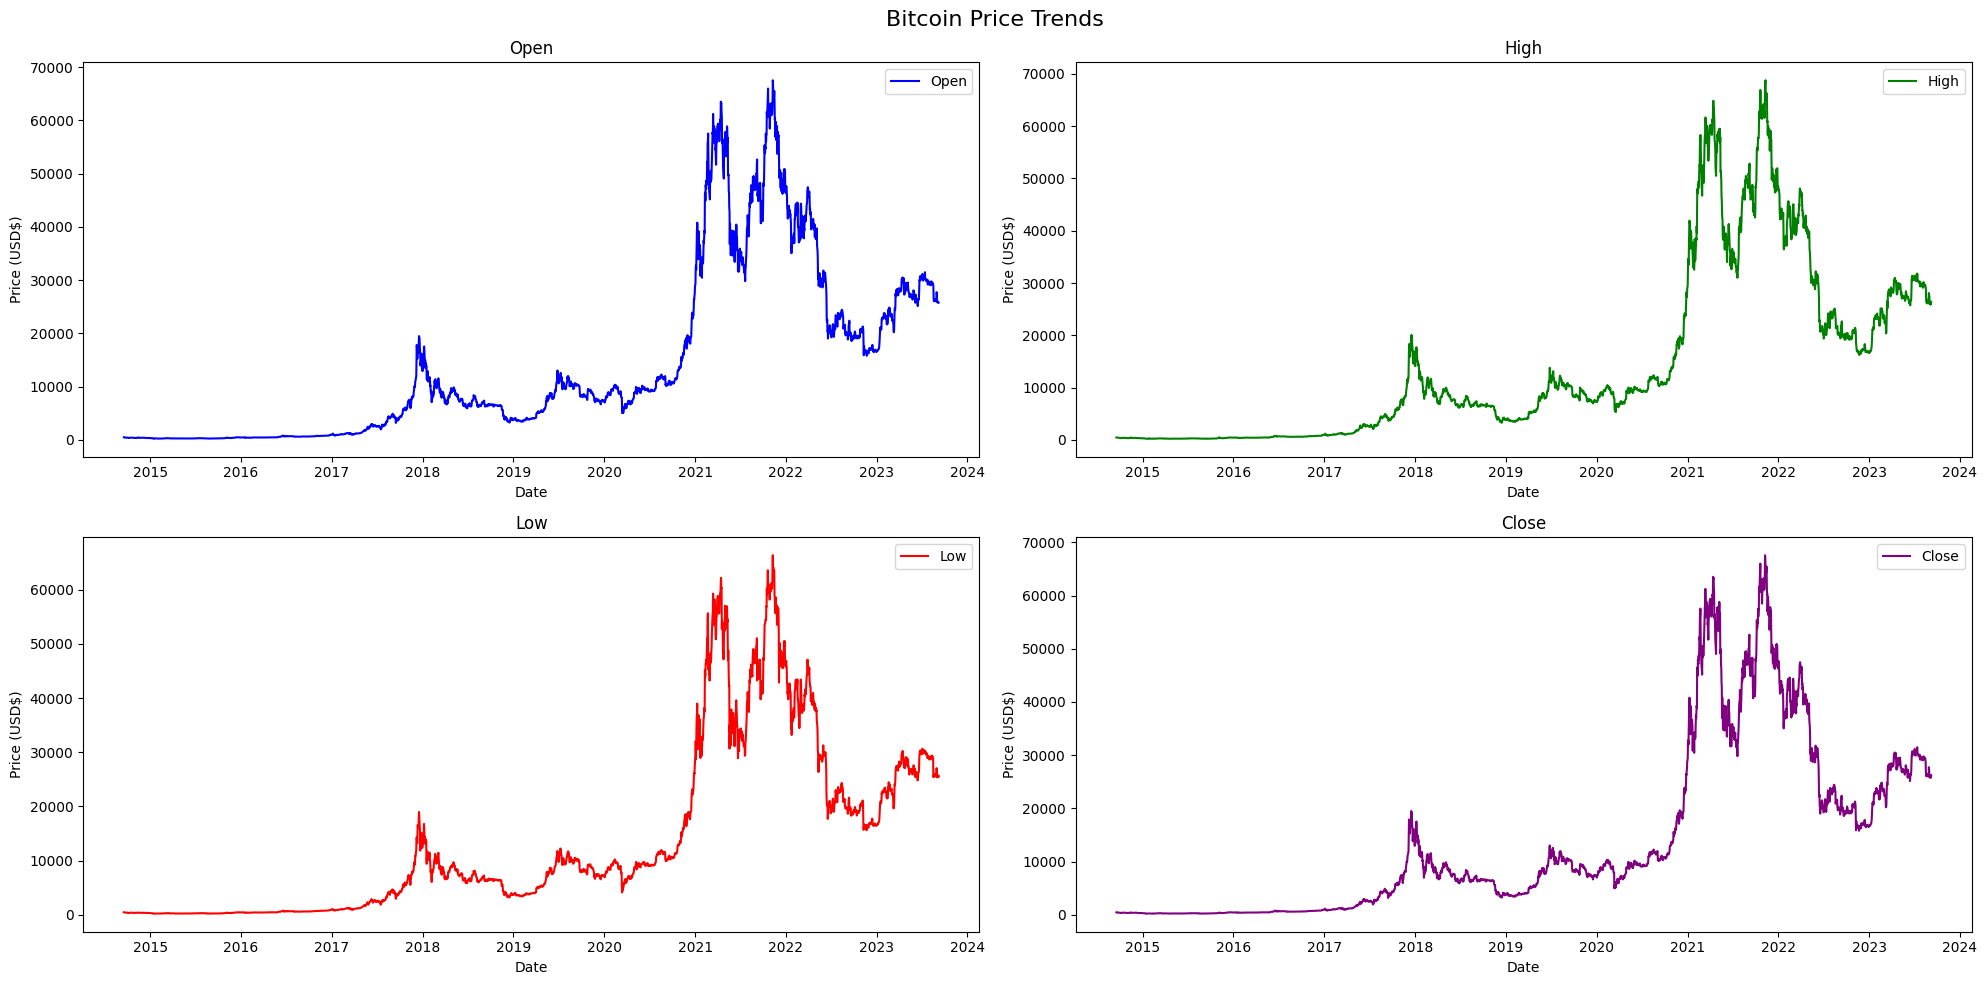

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

colors = ['blue', 'green', 'red', 'purple']

for index, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, index + 1)
    plt.plot(bitcoin_new["Date"], bitcoin_new[col], color=colors[index])
    plt.xlabel('Date')
    plt.ylabel('Price (USD$)')
    plt.title(col)
    plt.legend([col])
    
plt.suptitle('Bitcoin Price Trends', fontsize=16)
plt.tight_layout()
plt.show()

**Result**

An analysis of Bitcoin price trends over the course of 5 years, based on close, open, high, and low data, reveals significant fluctuations.

#### How does the price of bitcoin move over time using candlesticks?

In [18]:
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

In [19]:
import plotly.graph_objs as go

bitcoin_sampel = bitcoin_new[0:50]

trace = go.Candlestick(x=bitcoin_sampel['Date'],
               high=bitcoin_sampel['High'],
               open=bitcoin_sampel['Open'],
               low=bitcoin_sampel['Low'],
               close=bitcoin_sampel['Close'])

In [20]:
layout = go.Layout(
    title='Bitcoin Price',
    xaxis=dict(
        title='Date',
        showgrid=True,
        gridcolor='lightgray',
        tickformat='%Y-%m-%d',
        showline=True
    ),
    yaxis=dict(
        title='Price',
        showgrid=True,
        gridcolor='lightgray',
        showline=True
    ),
    margin=dict(l=40, r=20, t=40, b=20),
    plot_bgcolor='white',
    hovermode='x', 
    showlegend=False
)

In [21]:
fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.update_xaxes(
    rangebreaks=[dict(enabled=True, bounds=["sat", "sun"])]  # Menghilangkan akhir pekan pada sumbu x
)

fig.show()

**Result**

Bitcoin price trend analysis for 5 years using candlestick plots based on close, open, high and low shows significant variations in price changes. There are several factors that might be the cause.

#### How to analyze close price with a log scale?

Log is an abbreviation of the word "logarithm" in mathematics. Logarithm is a mathematical operation used to measure exponentiality or the ratio between two numbers. The logarithmic function measures the exponential required to convert one number to another number on a given basis.

There are lots of logarithmic functions in data analysis, in this analysis, we will apply logarithms to the logarithmic scale on the close price feature. The goal is to make it easier to read.

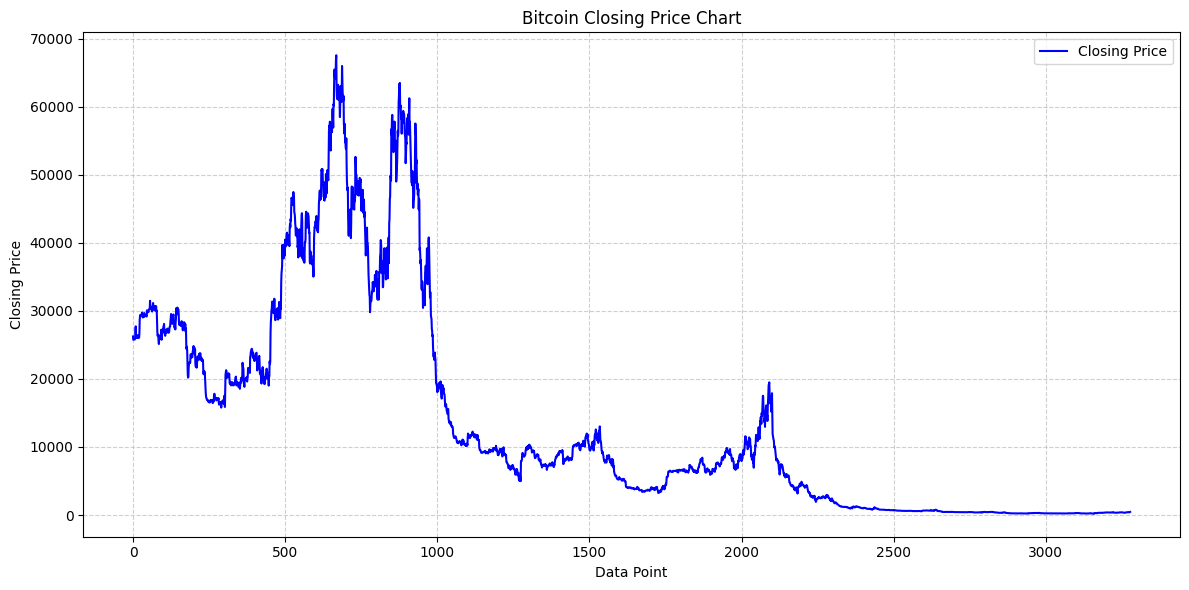

In [22]:
plt.figure(figsize=(12, 6))
bitcoin_new['Close'].plot(color='blue', linewidth=1.5, label='Closing Price')
plt.title('Bitcoin Closing Price Chart')
plt.xlabel('Data Point')
plt.ylabel('Closing Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [23]:
bitcoin_new

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-07,25748.312500,26409.302734,25608.201172,26240.195312,26240.195312,11088307100
1,2023-09-06,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327
2,2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
3,2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
4,2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
...,...,...,...,...,...,...,...
3273,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
3274,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3275,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3276,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


In [24]:
bitcoin_new.set_index('Date', inplace=True)

In [25]:
bitcoin_new

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-07,25748.312500,26409.302734,25608.201172,26240.195312,26240.195312,11088307100
2023-09-06,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327
2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523
...,...,...,...,...,...,...
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700


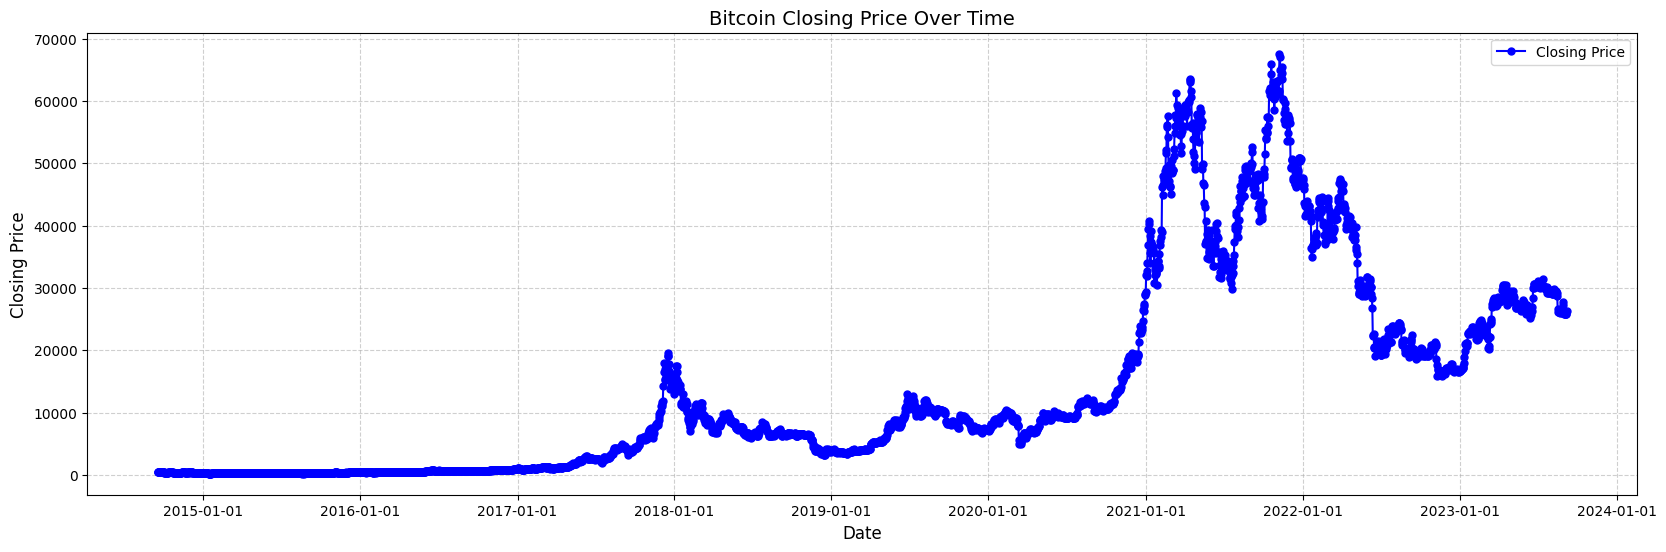

In [26]:
plt.figure(figsize=(20,6))

plt.plot(bitcoin_new.index, bitcoin_new['Close'], color='blue', linestyle='-', marker='o', markersize=5, label='Closing Price')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.title('Bitcoin Closing Price Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.show()

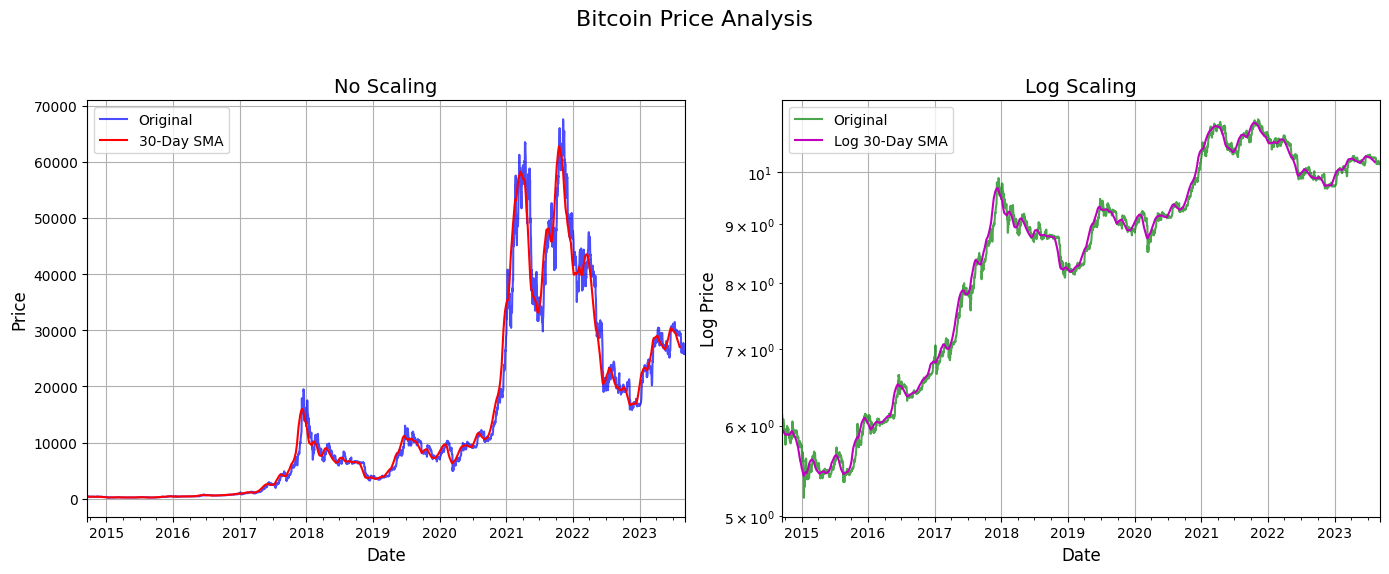

In [27]:
import numpy as np

sma_30d = bitcoin_new['Close'].rolling(window=30).mean()
sma_30d_log = np.log1p(sma_30d)

plt.figure(figsize=(14, 6))
plt.suptitle('Bitcoin Price Analysis', fontsize=16)

# Subplot 1
plt.subplot(1, 2, 1)
bitcoin_new['Close'].plot(color='b', alpha=0.7, label='Original')
sma_30d.plot(color='r', label='30-Day SMA')
plt.title('No Scaling', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.legend()

# Subplot 2
plt.subplot(1, 2, 2)
np.log1p(bitcoin_new['Close']).plot(color='g', alpha=0.7, label='Original')
sma_30d_log.plot(color='m', label='Log 30-Day SMA')
plt.title('Log Scaling', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Price', fontsize=12)
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### How to see annual, monthly and quartile close price trends along with daily price changes?

In [28]:
bitcoin_new.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-07,25748.312500,26409.302734,25608.201172,26240.195312,26240.195312,11088307100
2023-09-06,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327
2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2023-09-04,25968.169922,26081.525391,25657.025391,25812.416016,25812.416016,10680635106
2023-09-03,25869.472656,26087.148438,25817.031250,25969.566406,25969.566406,8962524523


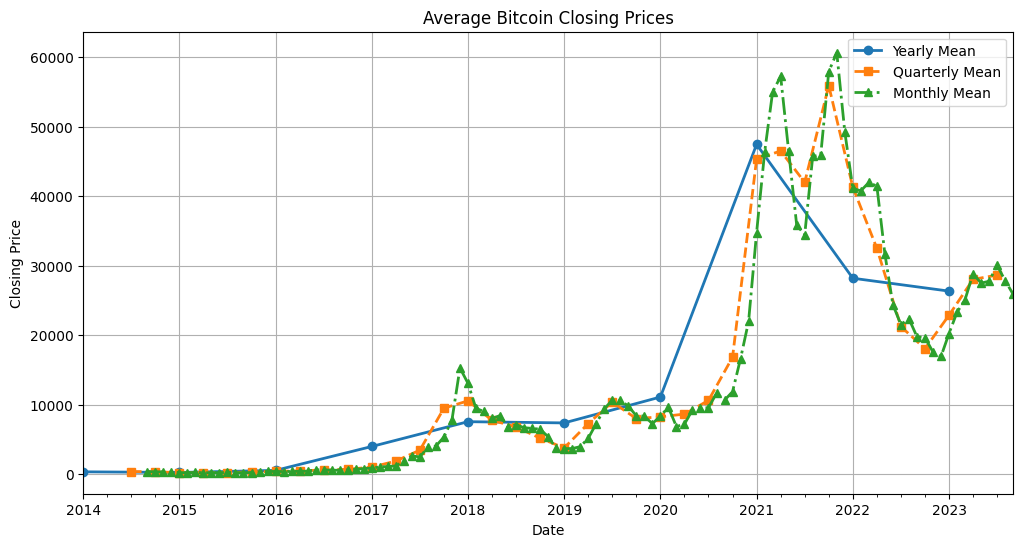

In [29]:
# Resample the data
yearly_mean = bitcoin_new['Close'].resample('Y').mean()
quarterly_mean = bitcoin_new['Close'].resample('Q').mean()
monthly_mean = bitcoin_new['Close'].resample('M').mean()

# Create the figure and set its size
plt.figure(figsize=(12, 6))

# Plot the yearly data with a label
yearly_mean.plot(label='Yearly Mean', marker='o', linestyle='-', linewidth=2)

# Plot the quarterly data with a label
quarterly_mean.plot(label='Quarterly Mean', marker='s', linestyle='--', linewidth=2)

# Plot the monthly data with a label
monthly_mean.plot(label='Monthly Mean', marker='^', linestyle='-.', linewidth=2)

# Add a title and axis labels
plt.title('Average Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [30]:
bitcoin_new['Close']

Date
2023-09-07    26240.195312
2023-09-06    25753.236328
2023-09-05    25779.982422
2023-09-04    25812.416016
2023-09-03    25969.566406
                  ...     
2014-09-21      398.821014
2014-09-20      408.903992
2014-09-19      394.795990
2014-09-18      424.440002
2014-09-17      457.334015
Name: Close, Length: 3278, dtype: float64

In [31]:
bitcoin_new['Close_pct_change'] = bitcoin_new['Close'].pct_change()*100
bitcoin_new['Close_pct_change']

Date
2023-09-07         NaN
2023-09-06   -1.855775
2023-09-05    0.103855
2023-09-04    0.125809
2023-09-03    0.608817
                ...   
2014-09-21   -0.828292
2014-09-20    2.528196
2014-09-19   -3.450199
2014-09-18    7.508691
2014-09-17    7.749979
Name: Close_pct_change, Length: 3278, dtype: float64

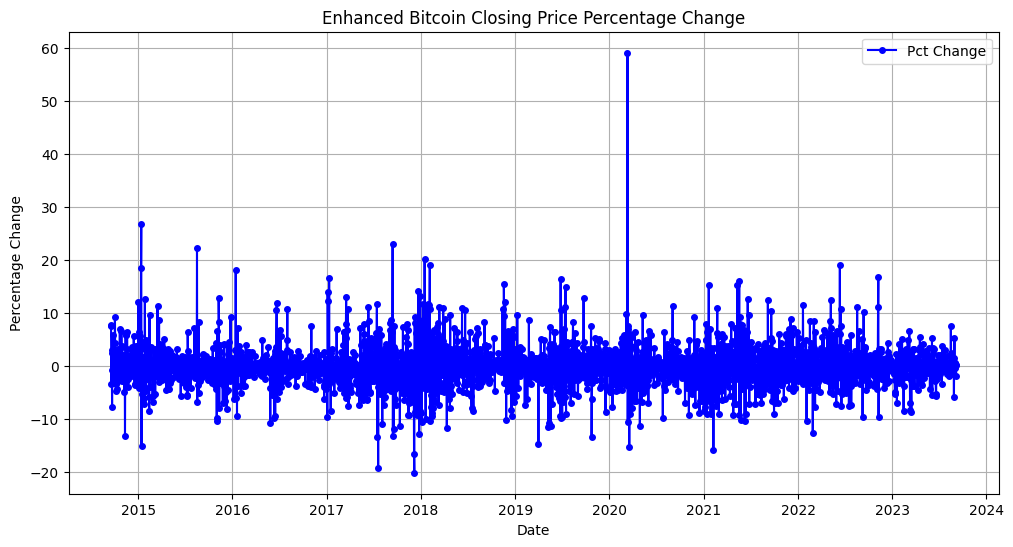

In [32]:
# Plot the data
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(bitcoin_new['Close_pct_change'], color='blue', linestyle='-', marker='o', markersize=4, label='Pct Change')

# Add title and axis labels
plt.title('Enhanced Bitcoin Closing Price Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change')

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [33]:
import cufflinks as cf

cf.go_offline()

In [34]:
# Makes the plot more interactive

import plotly.express as px

# Plot the percentage change in Bitcoin's closing price
px.line(bitcoin_new, x=bitcoin_new.index, y='Close_pct_change', title='Bitcoin Closing Price Percentage Change Over Time')